### Clase 10-11: Aprendizaje supervisado, regresión

Definición: Algoritmos que aprenden de una DB con pares tipo i/o
+ Aprender una función que permita obtener los valores de output a partir del input.
+ Con output contínuo: regresión
+ En clasificación: output discreto (binario o multiclase)
+ Tipos de regresión: Lineal, Polinomial, con penalización, logística

Otros modelos comunes:
+ Naive Bayes (basado en t. de Bayes)
+ Árboles de decisión, bosque aleatorio para clasificación, bosque aleatorio para regresión. Estos buscan posicionar elementos similares en las hojas.

In [1]:
#REGRESION LINEAL con un descriptor
# y = theta0 + theta1*x1 + e
# theta0: intercepto o bias
# xi variable independiente o descriptor, thetai parametros del modelo
# para los predictores (y) y los estimadores(theta) se sobrepone ^ en la notación
# una primera estimacion de desempeño es el error cuadratico medio en el eje Y
# minimizar el error cuadratico medio sobre todos los puntos
# existe una solución cerrada analítica por lo que no es necesaria la iteración
# para obtener los estimadores

import numpy as np
import matplotlib.pyplot as plt

In [28]:
#CONSTRUCCION DEL MODELO
#setear seed
np.random.seed(2)

X = 3*np.random.rand(100,1) #100x1
y = 5+3.5*X + np.random.randn(100,1)

#np.c_ : Translates slice objects to concatenation along the second axis.
X_ = np.c_[np.ones((100,1)),X]

theta_opt = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)
theta_opt

array([[4.74106117],
       [3.76507533]])

In [29]:
#PREDICCION
X_nuevo = np.array([[0],[3]])
X_aux = np.c_[np.ones((2,1)), X_nuevo]
y_pred = X_aux.dot(theta_opt)
y_pred

array([[ 4.74106117],
       [16.03628717]])

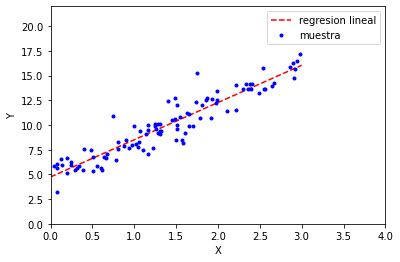

In [33]:
plt.plot(X_nuevo,y_pred,'r--')
plt.plot(X,y,'b.')
plt.ylabel('Y')
plt.xlabel('X')
plt.axis([0, 4, 0, 22])
plt.legend(['regresion lineal','muestra'])
plt.show()

#### SUPUESTOS REGRESION:
+ Relación lineal entre variable dep-ind
+ No hay multicolinealidad (variables ind no pueden explicar lo mismo)
+ Distribución normal de error
+ Variable ind libre de ruido
+ Homeocedasticidad: la varianza del error es constante a lo largo de las observaciones

In [2]:
### REGRESION POLINOMIAL
#y = th_0 + th_1*x_1+...+th_p*x_1^p
#también es lineal en los parámetros y tiene solución cerrada

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('ts.csv')
data.tail()

,tiempo,magnitud
1217,2689.815637,-5.168
1218,2690.973900,-5.236
1219,2707.923912,-5.249
1220,2717.867118,-5.305
1221,2722.847778,-5.289


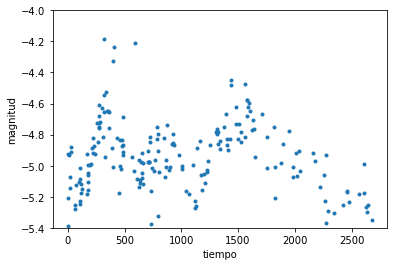

In [8]:
#muestreo de magnitud de una estrella variable
data_muestra = data.sample(200)
plt.scatter(data_muestra['tiempo'],data_muestra['magnitud'],marker='.')
plt.ylabel('magnitud')
plt.xlabel('tiempo')
plt.ylim(-5.4,-4.0)
plt.show()


In [16]:
#ajuste polinomial
RegLineal = LinearRegression()
RegLineal.fit(data[['tiempo']],data['magnitud']) #variable ind, variable dep

LinearRegression()

In [17]:
print(RegLineal.intercept_, RegLineal.coef_)

-4.903673361574064 [-2.41096697e-05]


In [20]:
x_lin = np.linspace(min(data['tiempo']),max(data['tiempo'])).reshape(-1,1)
print(x_lin.shape)
y_pred = RegLineal.predict(x_lin)

(50, 1)


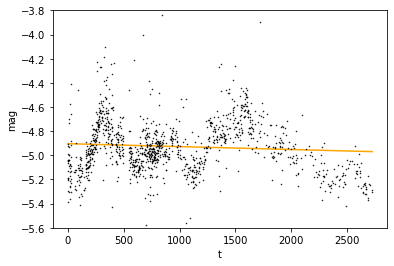

In [30]:
plt.plot(x_lin,y_pred,color='orange')
plt.plot(data['tiempo'],data['magnitud'],'.',color='k',markersize=1)
plt.ylabel('mag')
plt.ylim(-5.6,-3.8)
plt.xlabel('t')
plt.show()

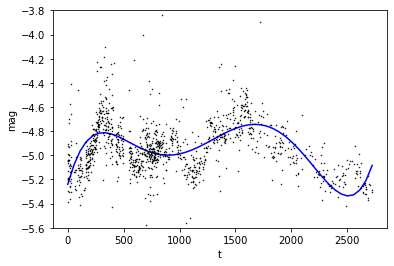

In [40]:
#santa cachucha, este ajuste es más inutil que mini ministro
#vamos a un mayor orden
poli = PolynomialFeatures(degree=5)
model = LinearRegression()

x = data['tiempo'].values.reshape(-1,1) #lo que sea que haya en la primera coma uno
data_poly = poli.fit_transform(x)
model.fit(data_poly, data['magnitud'])

x_lin = np.linspace(min(data['tiempo']),max(data['tiempo'])).reshape(-1,1)
data_poly_plot = poli.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)


plt.plot(x_lin,y_pred,color='blue')
plt.plot(data['tiempo'],data['magnitud'],'.',color='k',markersize=1)
plt.ylabel('mag')
plt.ylim(-5.6,-3.8)
plt.xlabel('t')
plt.show()


In [41]:
data_poly.shape #descriptor lineal + 5 cuadráticos

(1222, 6)